# Problem 3

# Part 1: Manual

In [13]:
# help from https://www.cs.helsinki.fi/group/bioinfo/teaching/dami_s10/dami_lecture3.pdf
# and from https://www.geeksforgeeks.org/python-print-sublists-list/
import pandas as pd
from itertools import combinations

itemset_dict = {}

def add_to_dicts(itemset):
  ''' 
  Takes a string itemset and populates the dictionary with all subsets and
  counts.
  '''
  items = itemset.split(',')
  subs = []

  for i in range(1,len(items)):
    subs += [list(j) for j in combinations(items, i)]

  for sub in subs:
    key = ','.join(sub)
    if itemset_dict.get(key) == None:
      itemset_dict[key] = 1
    else:
      itemset_dict[key]+=1

In [14]:
add_to_dicts('101,503,330,482')
add_to_dicts('503,bio,330')
add_to_dicts('101,503,330,482')
add_to_dicts('101,bio,330,482')
add_to_dicts('503,bio,330,482')
add_to_dicts('503,330,482')
add_to_dicts('bio,330')
add_to_dicts('101,503,bio')
add_to_dicts('101,330,482')
add_to_dicts('503,330')

In [15]:
itemset_dict

{'101': 5,
 '503': 7,
 '330': 9,
 '482': 6,
 '101,503': 3,
 '101,330': 4,
 '101,482': 4,
 '503,330': 5,
 '503,482': 4,
 '330,482': 6,
 '101,503,330': 2,
 '101,503,482': 2,
 '101,330,482': 3,
 '503,330,482': 3,
 'bio': 5,
 '503,bio': 3,
 'bio,330': 3,
 '101,bio': 2,
 'bio,482': 2,
 '101,bio,330': 1,
 '101,bio,482': 1,
 'bio,330,482': 2,
 '503,bio,330': 1,
 '503,bio,482': 1}

In [16]:
minsup = 3 # since minsup=0.3 and we have 10 samples

freq_itemsets = {k:v for (k,v) in itemset_dict.items() if v>=minsup}

In [17]:
freq_itemsets

{'101': 5,
 '503': 7,
 '330': 9,
 '482': 6,
 '101,503': 3,
 '101,330': 4,
 '101,482': 4,
 '503,330': 5,
 '503,482': 4,
 '330,482': 6,
 '101,330,482': 3,
 '503,330,482': 3,
 'bio': 5,
 '503,bio': 3,
 'bio,330': 3}

Given minsup=0.3 and the freq itemsets above, the following lattice can be produced:

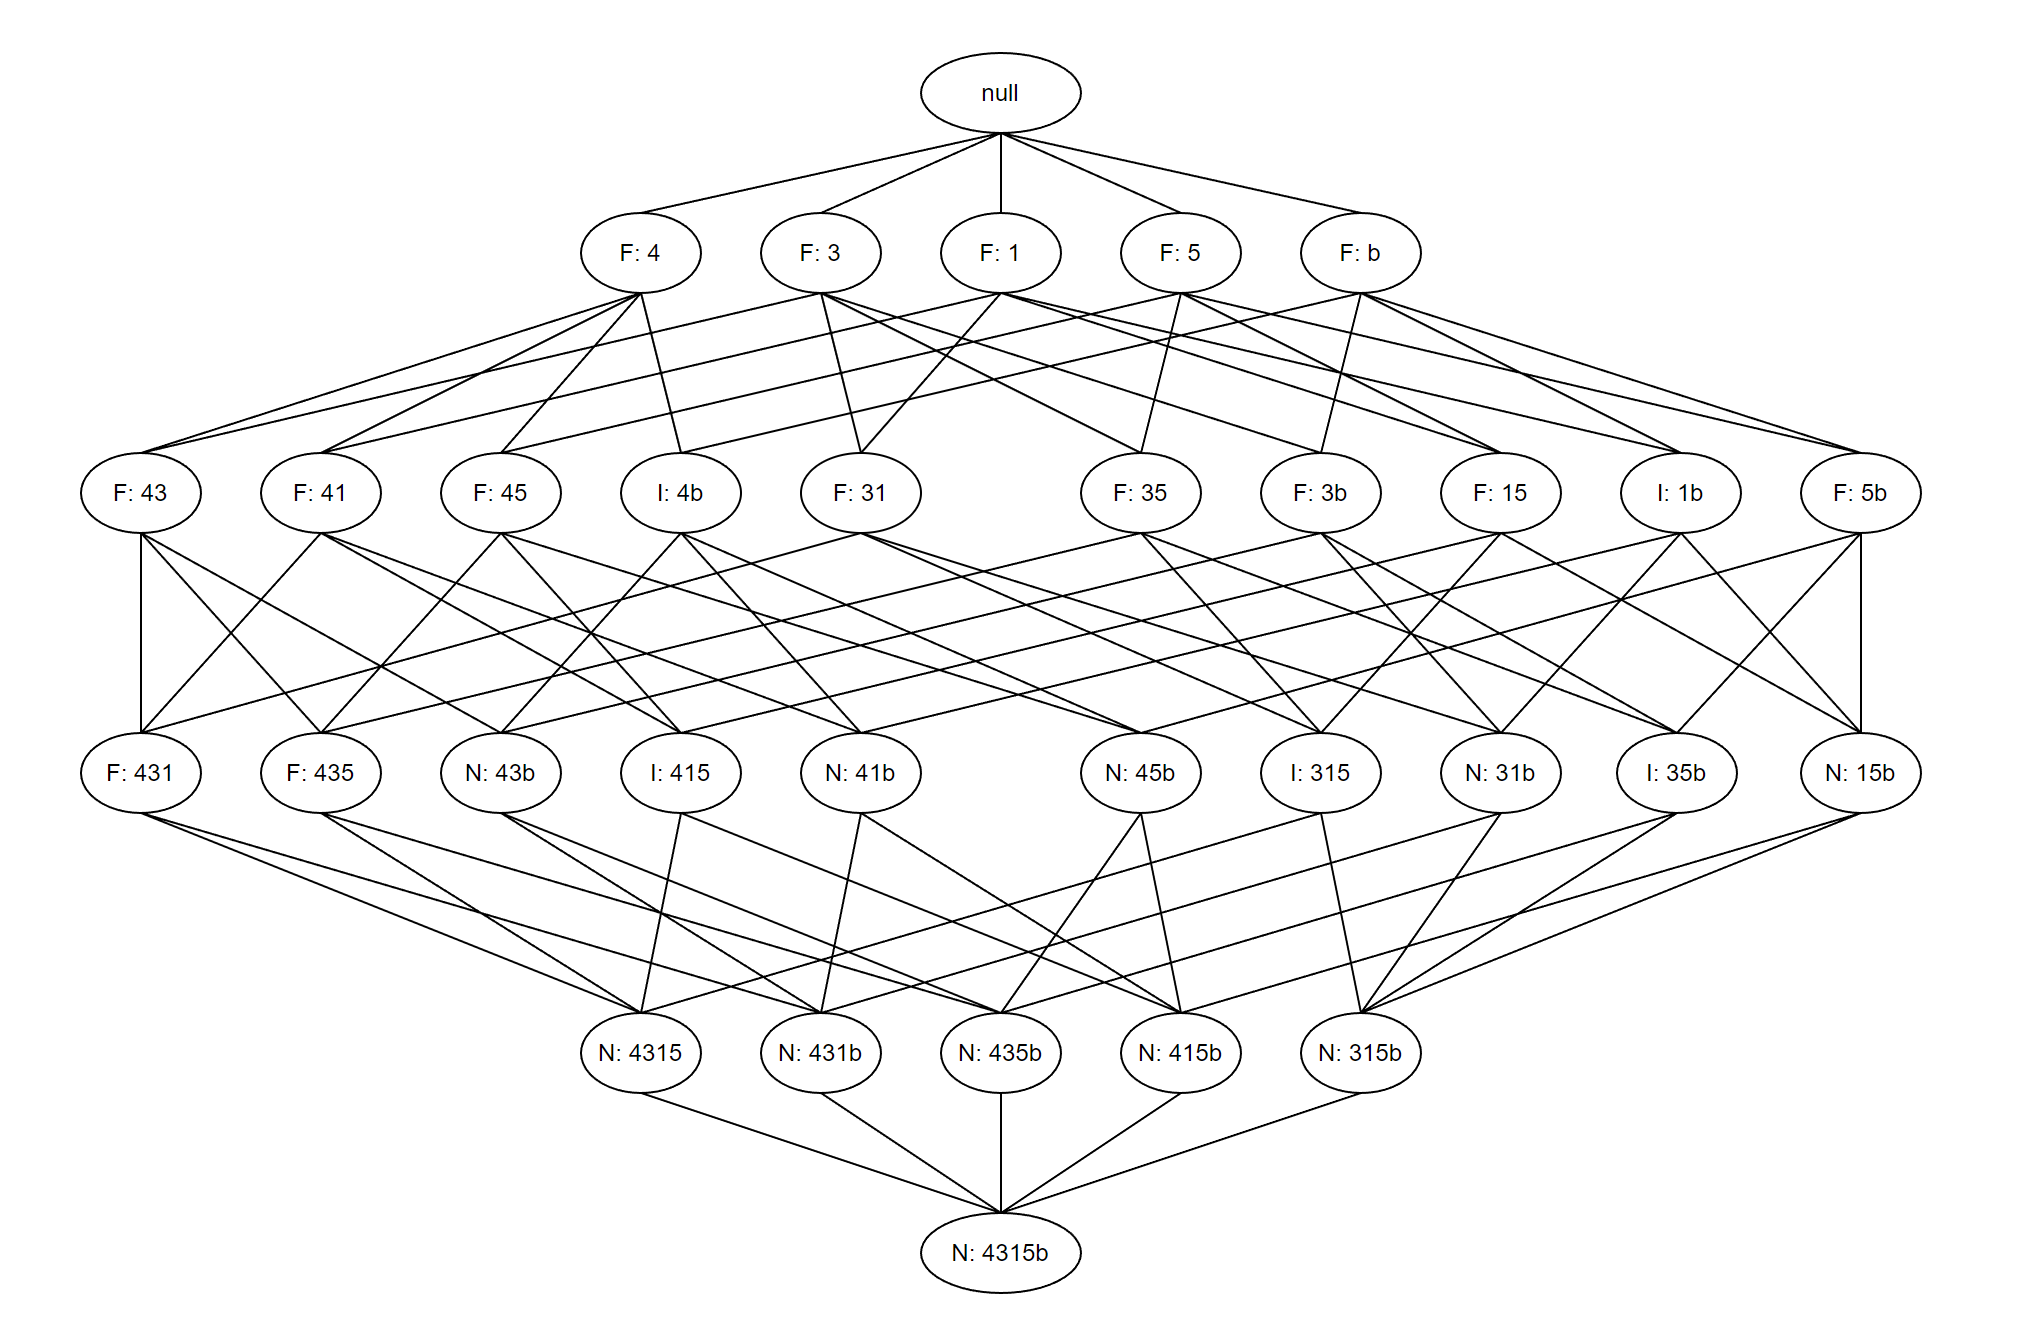

In [20]:
n_comb = 31
print("Percentage of frequent itemsets: {}%".format(len(freq_itemsets)/n_comb))

Percentage of frequent itemsets: 0.4838709677419355%


In [23]:
# There are 11 'N' nodes above
print("Pruning ratio: {}:{}".format(11, n_comb))

Pruning ratio: 11:31


In [24]:
# There are 5 'I' nodes above
print("False alarm rate: {:.2f}%".format(5/(5+len(freq_itemsets))*100))

False alarm rate: 25.00%


The following FP-Tree was produced with this insertion order:

* 330, 530, 482, 101 (Twice)
* 330, 530, bio
* 330, 482, 101, bio
* 330, 503, 482, bio
* 330, bio
* 330, 482, 101
* 330, 503

I rearranged the item sets based on the frequencies of the courses. For example, 330 appears 9 times so it was always at the start of a set. This way, I could minimize the size of the FP tree.

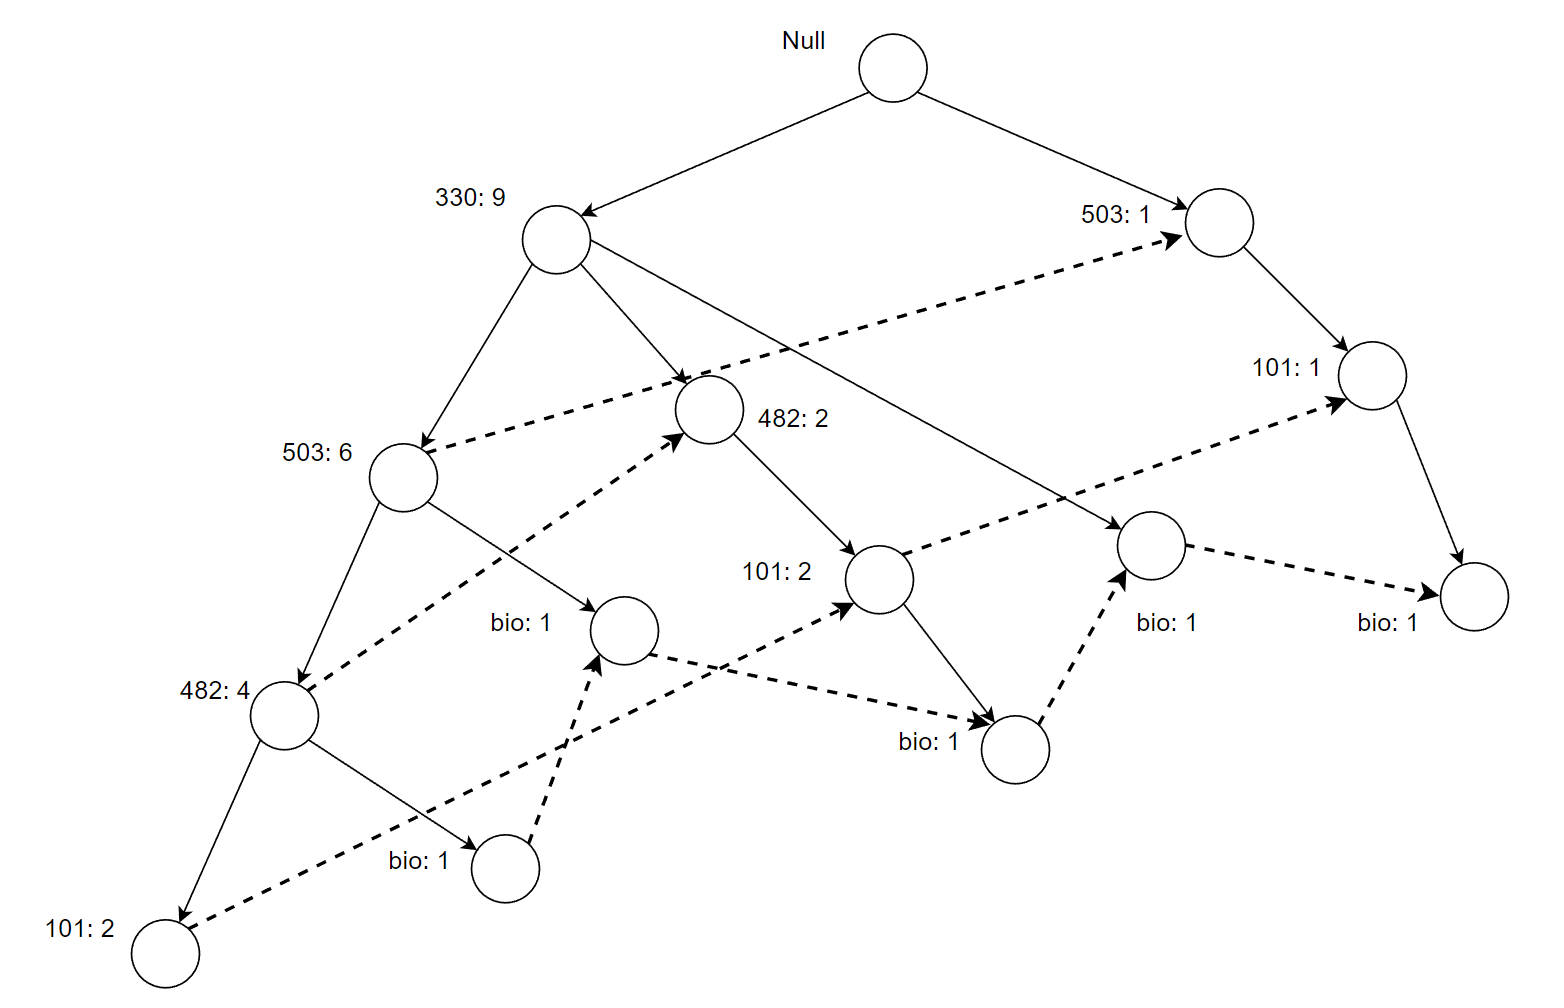

In [33]:
# I've already calculated the frequent itemsets earlier. Here is a more 
# printable format, following the bottom-up approach:

output_dict = {'101':[], 'bio':[], '482':[], '503':[], '330':[]}

for course in output_dict.keys():
  for key in freq_itemsets.keys():
    if course in key:
      output_dict[course].append(key)
  print("%s: %s" % (course, output_dict[course]))

101: ['101', '101,503', '101,330', '101,482', '101,330,482']
bio: ['bio', '503,bio', 'bio,330']
482: ['482', '101,482', '503,482', '330,482', '101,330,482', '503,330,482']
503: ['503', '101,503', '503,330', '503,482', '503,330,482', '503,bio']
330: ['330', '101,330', '503,330', '330,482', '101,330,482', '503,330,482', 'bio,330']


# Part 2: Retail

In [62]:
!pip install apyori

from apyori import apriori
import pandas as pd
import seaborn as sns 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [89]:
# help from https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/
# and https://www.section.io/engineering-education/apriori-algorithm-in-python/

# cleaning invoice
df.dropna(axis=0, subset=['Invoice'], inplace=True)
df.dropna(axis=0, subset=['Country'], inplace=True)
df.dropna(axis=0, subset=['Description'], inplace=True)
df['Invoice'] = df['Invoice'].astype('str')
df['Description'] = df['Description'].astype('str')

# dropping needless columns
df = df.drop(['StockCode', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID'],
             axis=1)
df.head()

,Invoice,Description,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,WHITE METAL LANTERN,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [90]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [91]:
import pdb
def join_descript(vals):
  x = vals.to_list()
  return ", ".join(x) 

agg_functions = {'Description': join_descript, 'Country': 'first'}
df_grouped = df.groupby(['Invoice']).aggregate(agg_functions)
df_grouped.head()

,Description,Country
Invoice,,
536365,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...",United Kingdom
536366,"HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT",United Kingdom
536367,"ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...",United Kingdom
536368,"JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...",United Kingdom
536369,BATH BUILDING BLOCK WORD,United Kingdom


In [92]:
# delete rows featuring countries with less than 10 invoices
# difficult to make reliable associations otherwise

countries = df_grouped.Country.unique()
for country in countries:
  count = df_grouped.Country.value_counts()[country]
  if count < 10 and count > 0:
    df_grouped = df_grouped[df_grouped.Country != country]

countries = df.Country.unique()
print(countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [126]:
# help from https://www.section.io/engineering-education/apriori-algorithm-in-python/
def get_item(x):
    tup = tuple(x)
    if len(tup) > 0:
      return tup[0]
    else:
      return ""

def inspect(output):
    lhs = [get_item(result[2][0][0]) for result in output]
    rhs = [get_item(result[2][0][1]) for result in output]
    support = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))

In [136]:
from itertools import islice

print('Top 5 associations for countries by confidence:\n')
for country in countries:
  print(country)
  df_country = df_grouped[df_grouped.Country == country]
  data = []
  for i in range(df_country.shape[0]):
    data.append(df_country['Description'][i].split(', '))
  
  out = []
  increments = range(9, 0, -1)
  increments = [i/10 for i in increments]
  increments += [0.05, 0.02, 0.01]

  # doing decreasing support then decreasing confidence since having high 
  # confidence but low support undermines the confidence metric.
  for minsup in increments:
    for mincon in increments:
      rule = apriori(transactions = data, min_support = minsup, 
                   min_confidence = mincon)
      out = list(rule)
      # stopping once I have 5 associations because going again will be weaker
      if len(out) >= 5: 
        break
    if len(out) >= 5:
      break
  if len(out) == 0:
     print('Could not find associations!\n')
     break
  print('minsup: {}   minconf: {}'.format(minsup, mincon))

  out_df = pd.DataFrame(inspect(out), 
                                columns = ['Left_Hand_Side', 'Right_Hand_Side', 
                                           'Support', 'Confidence', 'Lift'])
  out_df.sort_values(by=['Confidence'], ascending=[False],
                               inplace=True)
  out_df.reset_index(inplace = True, drop=True)
  min = 5
  if min > out_df.shape[0]:
    min = out_df.shape[0]
  for i in range(min):
    # pdb.set_trace()
    print('{}   -->   {}    S: {}  C: {}  L: {}'.format(out_df.Left_Hand_Side[i],
                                          out_df.Right_Hand_Side[i],
                                          out_df.Support[i],
                                          out_df.Confidence[i],
                                          out_df.Lift[i]))
  print()

Top 5 associations for countries by confidence:

United Kingdom
minsup: 0.05   minconf: 0.05
   -->   WHITE HANGING HEART T-LIGHT HOLDER    S: 0.10009074410163339  C: 0.10009074410163339  L: 1.0
   -->   JUMBO BAG RED RETROSPOT    S: 0.0897459165154265  C: 0.0897459165154265  L: 1.0
   -->   REGENCY CAKESTAND 3 TIER    S: 0.08312159709618874  C: 0.08312159709618874  L: 1.0
   -->   PARTY BUNTING    S: 0.07318511796733213  C: 0.07318511796733213  L: 1.0
   -->   LUNCH BAG RED RETROSPOT    S: 0.0648820326678766  C: 0.0648820326678766  L: 1.0

France
minsup: 0.1   minconf: 0.8
ROUND SNACK BOXES SET OF4 WOODLAND    -->   POSTAGE    S: 0.12581344902386118  C: 0.9062500000000001  L: 1.3390424679487183
SET/6 RED SPOTTY PAPER CUPS   -->   SET/6 RED SPOTTY PAPER PLATES    S: 0.10412147505422993  C: 0.8888888888888888  L: 8.195555555555554
PLASTERS IN TIN CIRCUS PARADE    -->   POSTAGE    S: 0.1279826464208243  C: 0.8676470588235295  L: 1.2820041478129716
RABBIT NIGHT LIGHT   -->   POSTAGE    S: